<a href="https://colab.research.google.com/github/Tejaswi4563/AI-Agent/blob/main/ai_agent_for_museam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install transformers timm torch torchvision torchaudio pytorch-lightning
!pip install googletrans==4.0.0-rc1
!pip install gtts
!pip install Pillow
!pip install opencv-python


In [4]:
from google.colab import files
uploaded = files.upload()  # Upload a monument or painting image

Saving Museum.jpg to Museum (1).jpg


In [5]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").eval()

inputs = processor(image, return_tensors="pt")
caption_ids = model.generate(**inputs)
caption = processor.decode(caption_ids[0], skip_special_tokens=True)
print("🖼️ Caption:", caption)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

🖼️ Caption: a building with scr flags on the outside


In [6]:
from gtts import gTTS
import IPython.display as display

tts = gTTS(text=caption, lang='en')
tts.save("caption.mp3")
display.display(display.Audio("caption.mp3", autoplay=True))


In [7]:
from googletrans import Translator

translator = Translator()
translated = translator.translate(caption, dest="fr")  # Change 'fr' to any language code
print("🌍 Translated (French):", translated.text)

tts_trans = gTTS(text=translated.text, lang='fr')
tts_trans.save("caption_fr.mp3")
display.display(display.Audio("caption_fr.mp3", autoplay=True))


🌍 Translated (French): un bâtiment avec des drapeaux SCR à l'extérieur


In [8]:
import torchvision.models as models
import torchvision.transforms as T

resnet = models.resnet50(pretrained=True)
resnet.eval()

transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])

img_tensor = transform(image).unsqueeze(0)
with torch.no_grad():
    output = resnet(img_tensor)
pred_idx = output.argmax().item()

!wget -q https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt
with open("imagenet_classes.txt") as f:
    labels = f.readlines()

label = labels[pred_idx].strip()
print("🔍 Classified As:", label)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 34.4MB/s]


🔍 Classified As: palace


In [9]:
from transformers import ViltProcessor, ViltForQuestionAnswering

vqa_processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
vqa_model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

question = "What is in the image?"
inputs = vqa_processor(image, question, return_tensors="pt")
out = vqa_model(**inputs)
answer = vqa_model.config.id2label[out.logits.argmax(-1).item()]

print("❓ Answer:", answer)

tts_ans = gTTS(text=answer, lang='en')
tts_ans.save("vqa.mp3")
display.display(display.Audio("vqa.mp3", autoplay=True))


preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/470M [00:00<?, ?B/s]

❓ Answer: building


😊 1 face(s) detected.


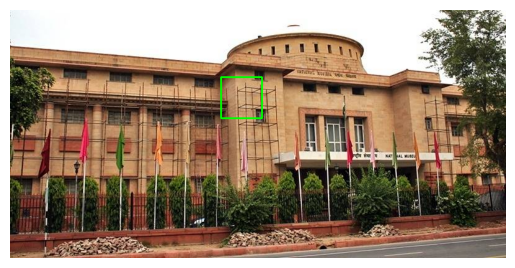

In [10]:
import cv2
import matplotlib.pyplot as plt

img_cv = cv2.imread(image_path)
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

if len(faces) == 0:
    print("😐 No face detected.")
else:
    print(f"😊 {len(faces)} face(s) detected.")
    for (x, y, w, h) in faces:
        cv2.rectangle(img_cv, (x, y), (x+w, y+h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
